In [7]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as m
import subprocess as sp

def run_cmd(nproc, x_points_num, t_points_num, max_x, max_t, iterations):
    cmd = ['wsl', 'mpirun', '-np', str(nproc), './main',
           str(x_points_num),
           str(t_points_num),
           str(max_x),
           str(max_t),
           str(iterations)
           ]
    output = sp.check_output(cmd, shell=True).decode('cp866')

    if iterations == 0:
        output = [a[:-1].split(' ') for a in (output.split('\n'))[:-1]]
        z = np.array(output, dtype=np.float32)
        x, y = np.meshgrid(np.arange(0, max_x, max_x / x_points_num), np.arange(0, max_t, max_t / t_points_num))
        return x, y, z

    return float(output)

def plot_3d(nproc, x_points_num, t_points_num, max_x, max_t):
    x, y, z = run_cmd(nproc, x_points_num, t_points_num, max_x, max_t, 0)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.set(xlabel='x', ylabel='t', zlabel='u', title='Calculated')
    ax.plot_surface(x, y, z, linewidth=0, antialiased=False, cmap=cm.coolwarm)

def plot_time_points(initial_points_num, end_points_num, factor, x_points_num, max_x, max_t, iterations):
    def calc_time(nproc):
        x, y = np.array([]), np.array([])
        t_points_num = initial_points_num
        while t_points_num < end_points_num:
            x = np.append(x, t_points_num)
            time = run_cmd(nproc, x_points_num, t_points_num, max_x, max_t, iterations)
            y = np.append(y, time)
            t_points_num *= factor
        return x, y

    fig, ax = plt.subplots()
    ax.grid()
    ax.set(xlabel='points number, n', ylabel='time, s')

    x, ys = calc_time(1)
    ax.plot(x, ys, label='serial')
    ax.legend()

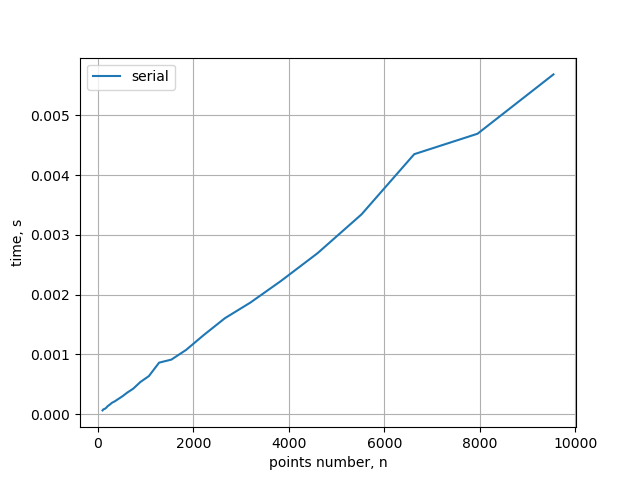

In [10]:
plot_time_points(100, 10000, 1.2, 100, 2, 2, 1)